In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
train_data= pd.read_csv('/car_breakdown_train.csv',header=0)
train_data.head()
##train_data.shape

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
test_data=pd.read_csv('/car_breakdown_test.csv' ,header=0)
test_data.head()
test_data.shape

(13096, 26)

In [ ]:
truth_data=pd.read_csv('/car_breakdown_test_truth.csv', header=0)
truth_data.head()



,vehicleId,RUL
0,1,112
1,2,98
2,3,69
3,4,82
4,5,91


In [ ]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicleId,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
days,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
ecoMode,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
cityMode,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
sportMode,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [ ]:
train_data.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'sportMode'], axis=1, inplace=True)
test_data.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'sportMode'], axis=1, inplace=True)

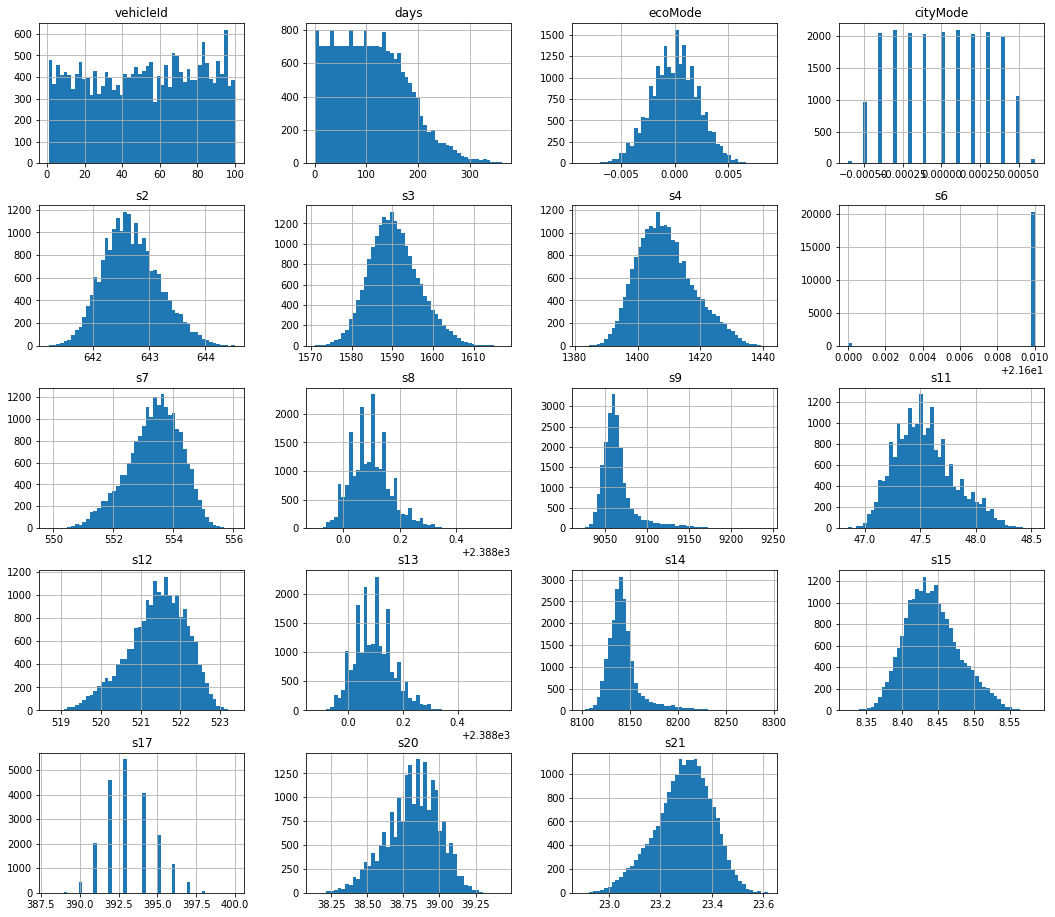

In [ ]:
train_data.hist(bins=50, figsize=(18,16))
plt.show()

In [ ]:
days_train = train_data.groupby('vehicleId', as_index=False)['days'].max()
days_train.head()

,vehicleId,days
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269


In [ ]:
days_test = test_data.groupby('vehicleId', as_index=False)['days'].max()
days_test.head()

,vehicleId,days
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


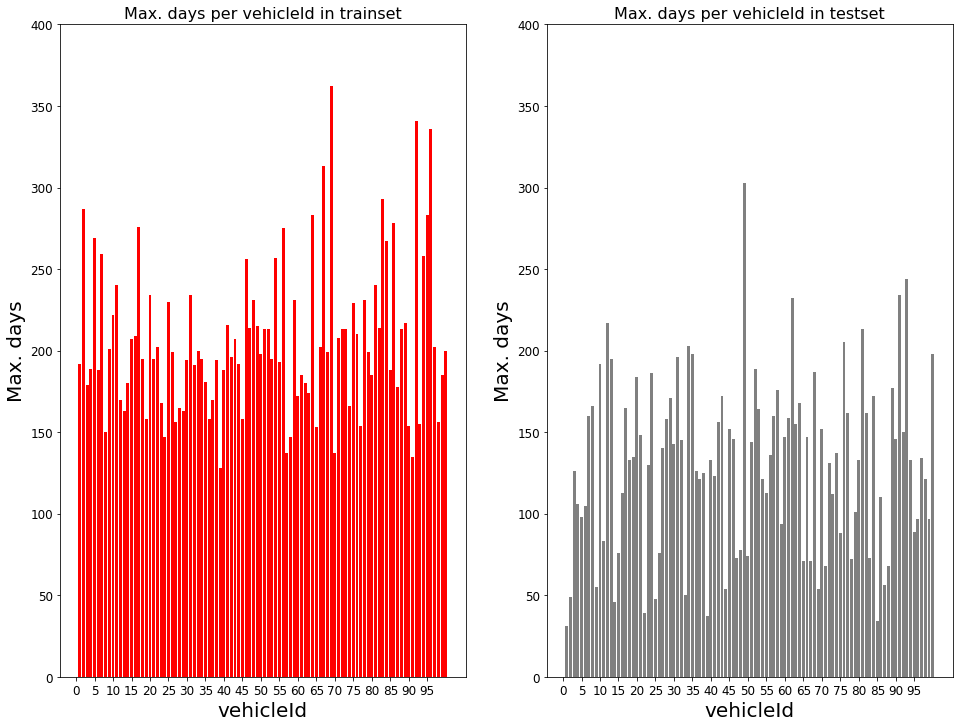

In [ ]:
fig = plt.figure(figsize = (16,12))
fig.add_subplot(1,2,1)
bar_labels = list(days_train['vehicleId'])
bars = plt.bar(list(days_train['vehicleId']), days_train['days'], color='red')
plt.ylim([0, 400])
plt.xlabel('vehicleId', fontsize=20)
plt.ylabel('Max. days', fontsize=20)
plt.title('Max. days per vehicleId in trainset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
fig.add_subplot(1,2,2)
bars = plt.bar(list(days_test['vehicleId']), days_test['days'], color='grey')
plt.ylim([0, 400])
plt.xlabel('vehicleId', fontsize=20)
plt.ylabel('Max. days', fontsize=20)
plt.title('Max. days per vehicleId in testset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()


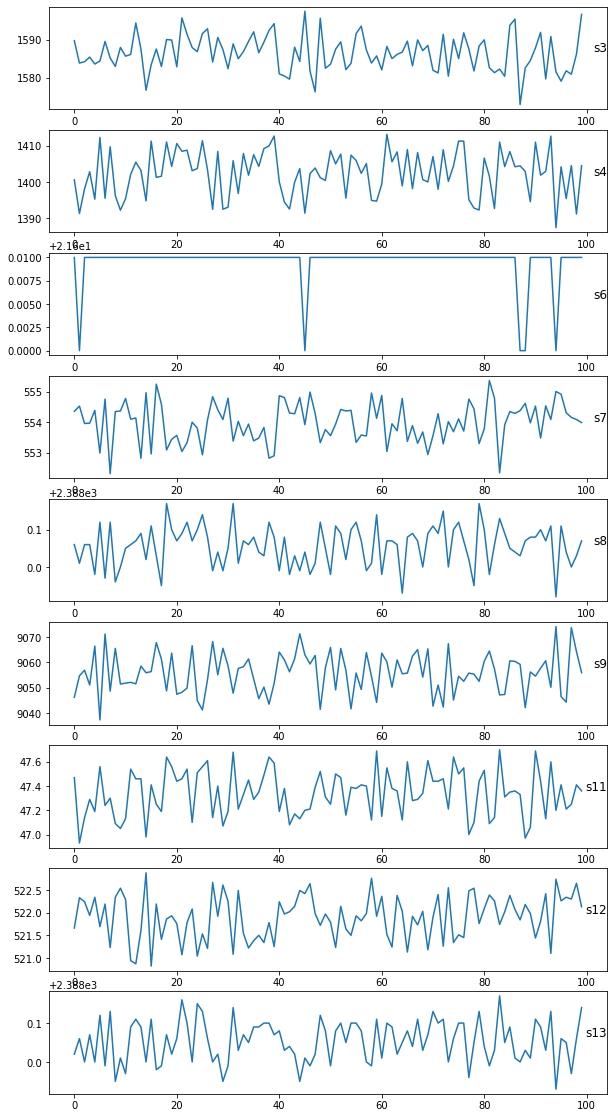

In [ ]:
values = train_data[train_data.days==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
  plt.subplot(len(groups), 1, i)
  plt.plot(values[:, group])
  plt.title(train_data.columns[group], y=0.5, loc='right')
  i += 1
plt.show() 

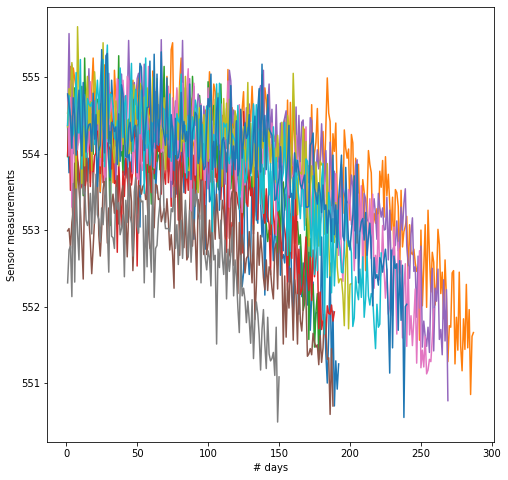

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot(train_data[train_data.vehicleId==1].days, train_data[train_data.vehicleId==1].s7)
plt.plot(train_data[train_data.vehicleId==2].days, train_data[train_data.vehicleId==2].s7)
plt.plot(train_data[train_data.vehicleId==3].days, train_data[train_data.vehicleId==3].s7)
plt.plot(train_data[train_data.vehicleId==4].days, train_data[train_data.vehicleId==4].s7)
plt.plot(train_data[train_data.vehicleId==5].days, train_data[train_data.vehicleId==5].s7)
plt.plot(train_data[train_data.vehicleId==6].days, train_data[train_data.vehicleId==6].s7)
plt.plot(train_data[train_data.vehicleId==7].days, train_data[train_data.vehicleId==7].s7)
plt.plot(train_data[train_data.vehicleId==8].days, train_data[train_data.vehicleId==8].s7)
plt.plot(train_data[train_data.vehicleId==9].days, train_data[train_data.vehicleId==9].s7)
plt.plot(train_data[train_data.vehicleId==10].days, train_data[train_data.vehicleId==10].s7)
plt.plot(train_data[train_data.vehicleId==11].days, train_data[train_data.vehicleId==11].s7)
plt.xlabel('# days')
plt.ylabel('Sensor measurements')
plt.show()

In [ ]:
rul_data = pd.DataFrame(test_data.groupby('vehicleId')['days'].max()).reset_index()
rul_data.columns = ['vehicleId', 'max']
rul_data.head()

,vehicleId,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [ ]:
truth_data['rtf'] = truth_data['RUL'] + rul_data['max']
truth_data.head()

,vehicleId,RUL,rtf
0,1,112,143
1,2,98,147
2,3,69,195
3,4,82,188
4,5,91,189


In [ ]:
truth_data.drop('RUL', axis=1, inplace=True)
test_data= test_data.merge(truth_data,on=['vehicleId'],how='left')
test_data['ttf']= test_data['rtf'] - test_data['days']
test_data.drop('rtf', axis=1, inplace=True)
test_data.head()

,vehicleId,days,ecoMode,cityMode,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,ttf
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,141
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,140
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,139
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,138


In [ ]:
train_data['ttf'] = train_data.groupby(['vehicleId'])['days'].transform(max)-train_data['days']
train_data.head()

,vehicleId,days,ecoMode,cityMode,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,ttf
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [ ]:
df_train=train_data.copy()
df_test=test_data.copy()
period=30
df_train['label_dummy'] = df_train['ttf'].apply(lambda x: 1 if x <= period else 0)
df_test['label_dummy'] = df_test['ttf'].apply(lambda x: 1 if x <= period else 0)
df_train.head()

,vehicleId,days,ecoMode,cityMode,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,ttf,label_dummy
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,0


In [ ]:
features_col_name=['ecoMode', 'cityMode', 's2', 's3', 's4','s6', 's7', 's8', 's9','s11',
                         's12', 's13', 's14', 's15', 's17', 's20', 's21']
target_col_name='label_dummy'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [ ]:
df_train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
vehicleId,20631.0,51.506568,29.227633,1.0000,26.0000,52.0000,77.0000,100.0000
days,20631.0,108.807862,68.880990,1.0000,52.0000,104.0000,156.0000,362.0000
ecoMode,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0000,0.0015,0.0087
cityMode,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
s2,20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s6,20631.0,21.609803,0.001389,21.6000,21.6100,21.6100,21.6100,21.6100
s7,20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
s8,20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600


In [ ]:
df_train[features_col_name]=sc.fit_transform(df_train[features_col_name])
df_test[features_col_name]=sc.transform(df_test[features_col_name])


In [ ]:
def gen_sequence(id_df, seq_length, seq_cols):
    df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    id_df=df_zeros.append(id_df,ignore_index=True)
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        lstm_array.append(data_array[start:stop, :])
    return np.array(lstm_array)

# function to generate labels
def gen_label(id_df, seq_length, seq_cols,label):
    df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    id_df=df_zeros.append(id_df,ignore_index=True)
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    y_label=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        y_label.append(id_df[label][stop])
    return np.array(y_label)

In [ ]:
seq_length=50
seq_cols=features_col_name

In [ ]:
# generate X_train
X_train=np.concatenate(list(list(gen_sequence(df_train[df_train['vehicleId']==id], seq_length, seq_cols)) for id in df_train['vehicleId'].unique()))
print(X_train.shape)

# generate y_train
y_train=np.concatenate(list(list(gen_label(df_train[df_train['vehicleId']==id], 50, seq_cols,'label_dummy')) for id in df_train['vehicleId'].unique()))
print(y_train.shape)


(20531, 50, 17)
(20531,)


In [ ]:
# generate X_test
X_test=np.concatenate(list(list(gen_sequence(df_test[df_test['vehicleId']==id], seq_length, seq_cols)) for id in df_test['vehicleId'].unique()))
print(X_test.shape)
# generate y_test
y_test=np.concatenate(list(list(gen_label(df_test[df_test['vehicleId']==id], 50, seq_cols,'label_dummy')) for id in df_test['vehicleId'].unique()))
print(y_test.shape)

(12996, 50, 17)
(12996,)


In [ ]:
#lstm model
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

nb_features =X_train.shape[2]
timestamp=seq_length

model = Sequential()

model.add(LSTM(
         input_shape=(timestamp, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 100)           47200     
                                                                 
 dropout_2 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 77,451
Trainable params: 77,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the network

model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.05, verbose=1,
          callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')])

Epoch 1/10
98/98 [==============================] - 16s 140ms/step - loss: 0.2079 - accuracy: 0.9200 - val_loss: 0.0984 - val_accuracy: 0.9581
Epoch 2/10
98/98 [==============================] - 13s 133ms/step - loss: 0.0837 - accuracy: 0.9661 - val_loss: 0.0779 - val_accuracy: 0.9747


In [ ]:
# training metrics
scores = model.evaluate(X_train, y_train, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))

103/103 [==============================] - 4s 44ms/step - loss: 0.0843 - accuracy: 0.9645
Accurracy: 0.9644927382469177


In [ ]:
##prediction

y_pred=model.predict_classes(X_test)
print('Accuracy of model on test data: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

In [ ]:
##probability of failure
def prob_failure(engine_vehicleId):

    engine_df=df_test[df_test.vehicleId==engine_vehicleId]
    engine_test=gen_sequence(engine_df,seq_length,seq_cols)
    m_pred=model.predict(engine_test)
    failure_prob=list(m_pred[-1]*100)[0]
    return failure_prob
prob_failure



<function __main__.prob_failure(engine_vehicleId)>

In [ ]:
##Car breakdown Prediction happened withing 30 days(probability)
engine_vehicleId= 6   # engine_vehicleId= you can input the VehicleId range(1,2,3,4......99) 

print('Probability that engine will fail within 30 days:',prob_failure(engine_vehicleId))

Probability that engine will fail within 30 days: 0.2443254
